In [3]:
import numpy as np
import pandas as pd
import spacy

# LDA to discover topics

LDA is a method to assign documents to topics and discover common words for those topics.

_Latent Diriclet Allocation_

In [4]:
npr = pd.read_csv('../data/npr.csv')
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [5]:
npr['Article'][0][:500]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this '

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
# max_df will remove words that appear in more than 90% of the documents
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [8]:
dtm = cv.fit_transform(npr['Article'])

In [9]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
LDA = LatentDirichletAllocation(n_components=7, random_state=42)

In [12]:
LDA.fit(dtm)

KeyboardInterrupt: 

## Grab vocab of words

In [ ]:
feature_names = cv.get_feature_names()

In [ ]:
import random

for i in range(7):
    rand_id = random.randint(0,len(feature_names))
    print(f"{feature_names[rand_id]}")


dc
residencies
crutcher
auditioned
finland
giuliano
copycat



## Grab the topics


In [ ]:
LDA.components_.shape

(7, 54777)

In [ ]:
single_topic = LDA.components_[0]

In [ ]:
# argsort will return the indices of the sorted array
# this is not the sorted array, but the indices of the sort array
# [2,0,1] -> biggest is element@1 smallest is element@2
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993])

In [ ]:
single_topic.argsort()[-10:] # grab last 10

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993])

In [ ]:
top_words = single_topic.argsort()[-20:]

In [ ]:
for index in top_words:
    print(cv.get_feature_names()[index])

president
state
tax
insurance
trump
companies
money
year
federal
000
new
percent
government
company
million
care
people
health
said
says



## Grab the highest probability words for each topic

In [13]:
def get_top_words(topic_id, n):
    topic = LDA.components_[topic_id]
    return topic.argsort()[ -1 * n:]
def print_top_words(topic_id, n):
    top_words = get_top_words(topic_id, n)
    ls = []
    for index in top_words:
        ls.append(cv.get_feature_names()[index])
    print(ls)
def print_top_words_for_all_topics(n):
    for i in range(len(LDA.components_)):
        print_top_words(i, n)

print_top_words_for_all_topics(10)

['trump', 'new', '000', 'government', 'million', 'company', 'health', 'people', 'said', 'says']
['says', 'russia', 'npr', 'police', 'people', 'news', 'told', 'president', 'trump', 'said']
['water', 'city', 'time', 'food', 'new', 'years', 'just', 'people', 'like', 'says']
['disease', 'patients', 'children', 'just', 'study', 'like', 'women', 'health', 'people', 'says']
['new', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']
['new', 'way', 'music', 'really', 'time', 'know', 'think', 'people', 'just', 'like']
['people', 'time', 'schools', 'just', 'education', 'like', 'new', 'students', 'school', 'says']


In [16]:
n = 15
for i, topic in enumerate(LDA.components_):
    print(f"Topic {i}")
    print([cv.get_feature_names()[j] for j in topic.argsort()[-1 * n:]])
    print("\n")

Topic 0
['companies', 'federal', 'year', 'care', 'percent', 'trump', 'new', '000', 'government', 'million', 'company', 'health', 'people', 'said', 'says']


Topic 1
['military', 'government', 'house', 'security', 'reports', 'says', 'russia', 'npr', 'police', 'people', 'news', 'told', 'president', 'trump', 'said']


Topic 2
['world', 'way', 'family', 'home', 'day', 'water', 'city', 'time', 'food', 'new', 'years', 'just', 'people', 'like', 'says']


Topic 3
['time', 'don', 'medical', 'new', 'years', 'disease', 'patients', 'children', 'just', 'study', 'like', 'women', 'health', 'people', 'says']


Topic 4
['voters', 'vote', 'party', 'law', 'obama', 'new', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


Topic 5
['says', 've', 'going', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think', 'people', 'just', 'like']


Topic 6
['data', 'science', 'years', 'percent', 'university', 'people', 'time', 'schools', 'just', 'education

## Add Topic to dataframe

In [17]:
topic_results = LDA.transform(dtm)

This now fits the shape of our original dataframe... `11k` documents

In [18]:
topic_results.shape

(11992, 7)

In [20]:
# notice this looks like it belongs to a single topic at index 1
# these are the probabilities that the article belongs to that topic
topic_results[0].round(2)

array([0.01, 0.75, 0.  , 0.  , 0.23, 0.  , 0.  ])

Using `argmax` we get the index that has the highest value

In [21]:
topic_results[0].argmax()

1

## Add to the dataframe

And with these tricks we can update the original dataframe

In [22]:
npr['Topic'] = topic_results.argmax(axis=1)
npr

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
...,...,...
11987,The number of law enforcement officers shot an...,1
11988,"Trump is busy these days with victory tours,...",4
11989,It’s always interesting for the Goats and Soda...,3
11990,The election of Donald Trump was a surprise to...,4


In [25]:
import plotly.express as px

<AxesSubplot:>

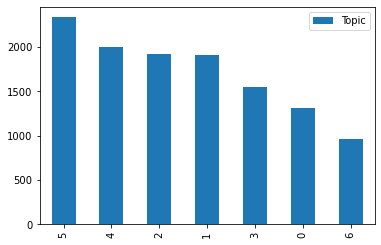

In [32]:
pd.DataFrame(npr['Topic'].value_counts()).plot.bar()

In [35]:
px.bar(pd.DataFrame(npr['Topic'].value_counts().sort_values()))